In [48]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge # Added Ridge import
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [1]:
path = kagglehub.dataset_download("muonneutrino/new-york-city-census-data")

print("Path to dataset files:", path)

100%|██████████| 343k/343k [00:00<00:00, 69.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/muonneutrino/new-york-city-census-data/versions/2


In [33]:
df = pd.read_csv(os.path.join(path, 'nyc_census_tracts.csv'))

df.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusTract      2167 non-null   int64  
 1   County           2167 non-null   object 
 2   Borough          2167 non-null   object 
 3   TotalPop         2167 non-null   int64  
 4   Men              2167 non-null   int64  
 5   Women            2167 non-null   int64  
 6   Hispanic         2128 non-null   float64
 7   White            2128 non-null   float64
 8   Black            2128 non-null   float64
 9   Native           2128 non-null   float64
 10  Asian            2128 non-null   float64
 11  Citizen          2167 non-null   int64  
 12  Income           2101 non-null   float64
 13  IncomeErr        2101 non-null   float64
 14  IncomePerCap     2121 non-null   float64
 15  IncomePerCapErr  2121 non-null   float64
 16  Poverty          2125 non-null   float64
 17  ChildPoverty  

In [35]:
df.describe()

,CensusTract,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,2.167000e+03,2167.000000,2167.000000,2167.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2167.000000,...,2124.000000,2124.000000,2124.000000,2106.000000,2167.000000,2124.000000,2124.00000,2124.000000,2124.000000,2125.000000
mean,3.605476e+10,3888.667743,1852.812183,2035.855561,26.624671,33.055827,23.950799,0.198590,13.442622,2436.468389,...,9.048070,2.306921,3.749105,40.831576,1813.498385,79.536205,14.19355,6.151271,0.118644,9.757788
std,2.594875e+07,2240.050968,1063.921420,1212.765249,22.662106,30.421463,29.476758,0.700418,16.446275,1538.399585,...,9.623892,2.872501,4.560174,7.105916,1180.593180,6.923979,7.23155,3.851846,0.391563,5.786948
min,3.600500e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,15.200000,0.000000,38.600000,0.00000,0.000000,0.000000,0.000000
25%,3.604703e+10,2359.500000,1113.000000,1224.500000,9.000000,4.100000,1.500000,0.000000,2.100000,1446.000000,...,3.300000,0.500000,1.300000,37.200000,1052.500000,75.000000,8.80000,3.500000,0.000000,5.900000
50%,3.604712e+10,3550.000000,1699.000000,1848.000000,18.400000,22.950000,7.800000,0.000000,6.700000,2140.000000,...,6.500000,1.500000,2.800000,41.400000,1579.000000,79.900000,13.30000,5.600000,0.000000,8.800000
75%,3.608103e+10,4957.500000,2360.500000,2571.500000,39.900000,60.100000,39.075000,0.000000,18.925000,2976.000000,...,10.800000,3.200000,5.100000,45.375000,2273.500000,84.400000,18.70000,8.200000,0.000000,12.600000
max,3.608599e+10,28926.000000,13460.000000,15466.000000,100.000000,100.000000,100.000000,11.300000,89.800000,22905.000000,...,100.000000,55.600000,100.000000,70.500000,12780.000000,100.000000,53.70000,61.400000,3.900000,100.000000


In [36]:
df.isnull().sum()

,0
CensusTract,0
County,0
Borough,0
TotalPop,0
Men,0
Women,0
Hispanic,39
White,39
Black,39
Native,39


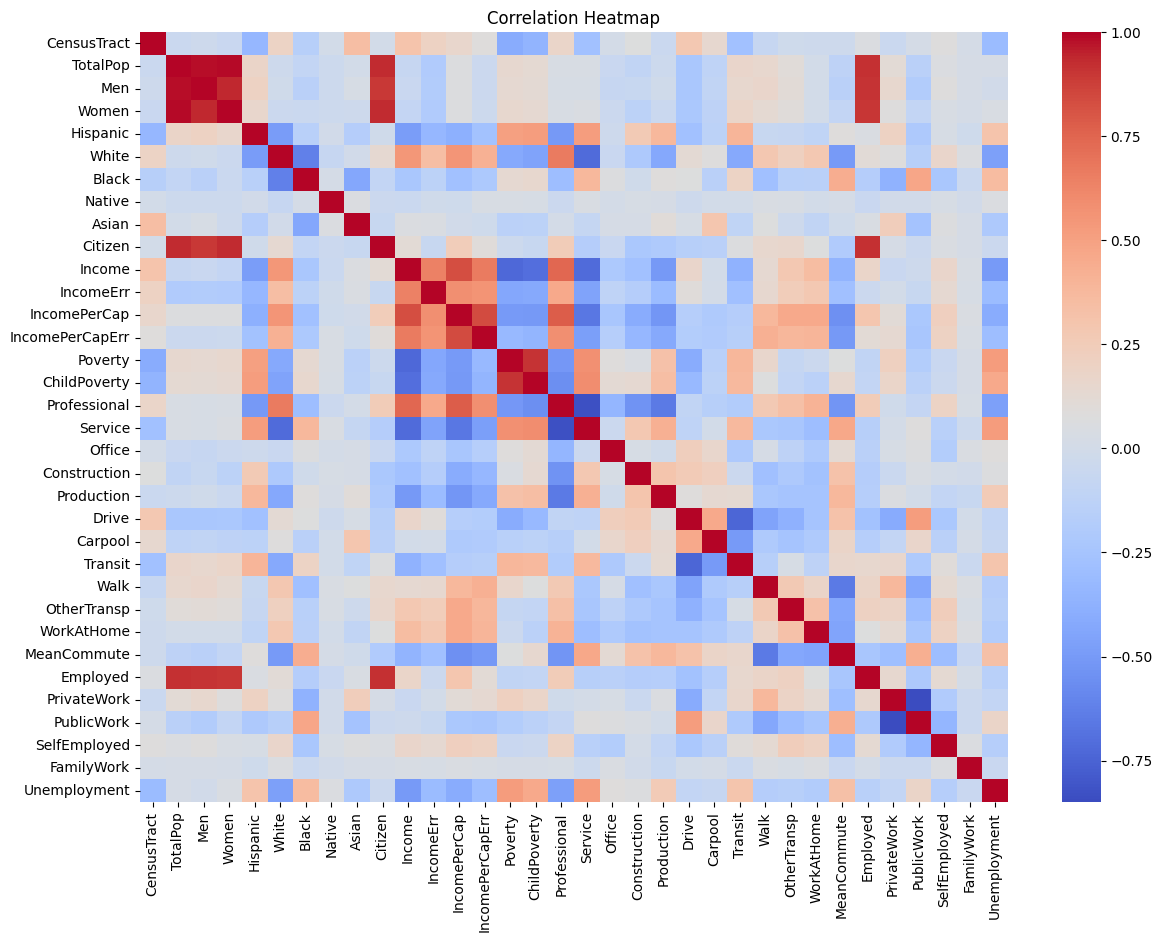

In [16]:
# Correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [42]:
target = "Income"

# Drop rows where the target variable is NaN
df_cleaned = df.dropna(subset=[target])

y = df_cleaned[target]
X = df_cleaned.drop(columns=[target, "CensusTract", "County", "Borough"], errors='ignore')

In [43]:
# Fill missing numeric values
X = X.fillna(X.mean())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42
)


In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [46]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [49]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


Ridge()

In [50]:
sgd = SGDRegressor(max_iter=2000, learning_rate="invscaling", eta0=0.01)
sgd.fit(X_train, y_train)


SGDRegressor(max_iter=2000)

In [51]:
models = {
    "Linear Regression": lr,
    "Random Forest": rf,
    "Ridge Regression": ridge,
    "SGD Gradient Descent": sgd
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))



Linear Regression Results:
MSE: 88635018.27968943
MAE: 7085.365131583593
R² Score: 0.8990096859070448

Random Forest Results:
MSE: 88200856.21879436
MAE: 7033.0054038004755
R² Score: 0.8995043680738457

Ridge Regression Results:
MSE: 88117225.09455846
MAE: 7078.7390284400035
R² Score: 0.8995996569751001

SGD Gradient Descent Results:
MSE: 89946637.82884818
MAE: 7142.010802525571
R² Score: 0.8975152328927517


In [52]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
print("Best RF params:", grid_rf.best_params_)


Best RF params: {'max_depth': 10, 'n_estimators': 100}


In [53]:
grid_ridge = GridSearchCV(
    Ridge(),
    {"alpha": [0.1, 1, 10, 50]},
    cv=5,
    scoring="neg_mean_squared_error"
)

grid_ridge.fit(X_train, y_train)
print("Best Ridge alpha:", grid_ridge.best_params_)


Best Ridge alpha: {'alpha': 1}


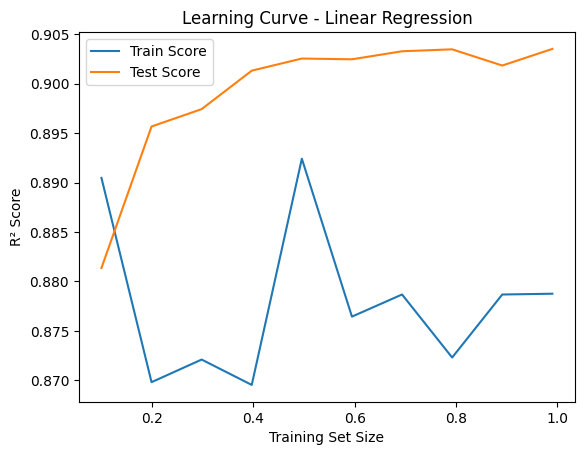

In [55]:
train_sizes = np.linspace(0.1, 0.99, 10) # Changed 1.0 to 0.99 to be within (0.0, 1.0) range
train_scores = []
test_scores = []

for size in train_sizes:
    X_t, _, y_t, _ = train_test_split(X_scaled, y, train_size=size)
    lr_temp = LinearRegression()
    lr_temp.fit(X_t, y_t)

    train_scores.append(lr_temp.score(X_t, y_t))
    test_scores.append(lr_temp.score(X_test, y_test))

plt.plot(train_sizes, train_scores, label="Train Score")
plt.plot(train_sizes, test_scores, label="Test Score")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve - Linear Regression")
plt.legend()
plt.show()

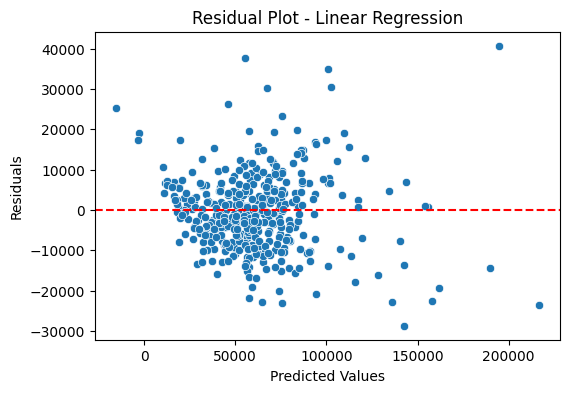

In [63]:
import seaborn as sns

y_pred = lr.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot - Linear Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


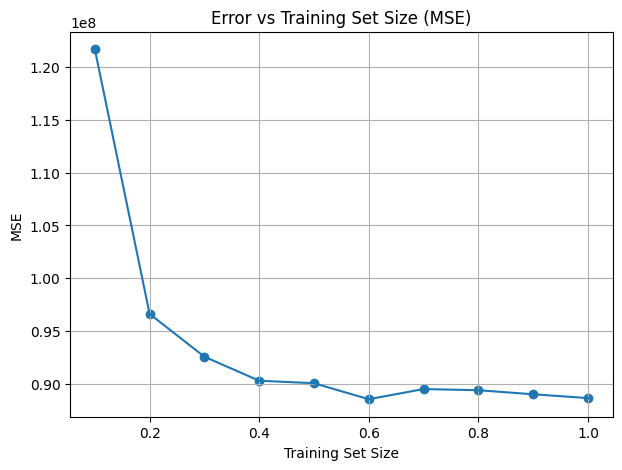

In [64]:
from sklearn.metrics import mean_squared_error

train_sizes = np.linspace(0.1, 1.0, 10)
mse_scores = []

for size in train_sizes:
    X_partial = X_train[:int(len(X_train)*size)]
    y_partial = y_train[:int(len(y_train)*size)]

    model = LinearRegression()
    model.fit(X_partial, y_partial)
    y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(7,5))
plt.plot(train_sizes, mse_scores)
plt.scatter(train_sizes, mse_scores)
plt.title("Error vs Training Set Size (MSE)")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.grid(True)
plt.show()
